In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle

In [2]:
dataset = pd.read_csv('carprice.csv')
dataset.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
dataset.shape

(205, 26)

In [4]:
dataset.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [3]:
company = dataset['CarName'].apply(lambda x:x.split(' ')[0])
dataset.insert(3,"CompanyName",company)
dataset.drop(['CarName'],axis = 1,inplace = True)

In [4]:
dataset['doors'] = np.where(dataset['doornumber']=='two',2,4)
dataset.drop('doornumber',axis=1,inplace=True)

In [5]:
def word_to_int(word):
    word_dict = {'two':2,'three':3,'four':4,'five':5,'six':6,'eight':8,'twelve':12}
    return word_dict[word]

In [6]:
dataset['cylindernumber'] = dataset['cylindernumber'].apply(lambda x: word_to_int(x))

In [7]:
dataset['mileage'] = (0.55* dataset['citympg']) + (0.45*dataset['highwaympg'])
dataset.drop(['citympg','highwaympg'],axis=1,inplace = True)
dataset['mileage'] = np.floor(dataset['mileage'])

In [8]:
categorical_features = [features for features in dataset.columns if dataset[features].dtype=='O']
categorical_features

['CompanyName',
 'fueltype',
 'aspiration',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'fuelsystem']

In [9]:
numerical_features = [features for features in dataset.columns if dataset[features].dtype!='O']
numerical_features

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'cylindernumber',
 'enginesize',
 'boreratio',
 'stroke',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'price',
 'doors',
 'mileage']

In [10]:
dataset.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
price               0
doors               0
mileage             0
dtype: int64

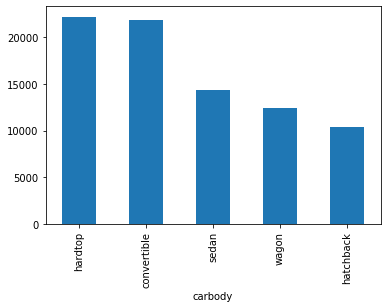

In [13]:
df = dataset.groupby(['carbody'])['price'].mean().sort_values(ascending = False)
df.plot.bar()

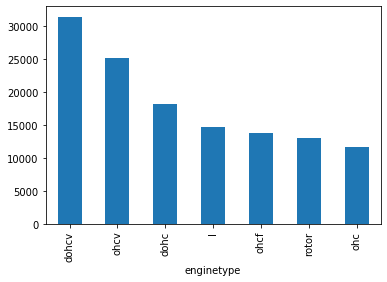

In [14]:
df = dataset.groupby(['enginetype'])['price'].mean().sort_values(ascending = False)
df.plot.bar()

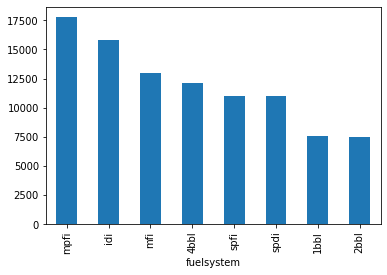

In [15]:
df = dataset.groupby(['fuelsystem'])['price'].mean().sort_values(ascending = False)
df.plot.bar()

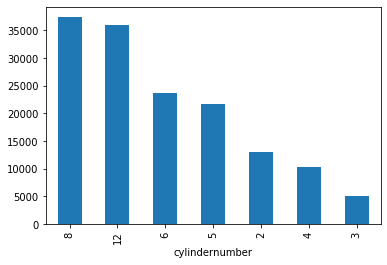

In [16]:
df = dataset.groupby(['cylindernumber'])['price'].mean().sort_values(ascending = False)
df.plot.bar()

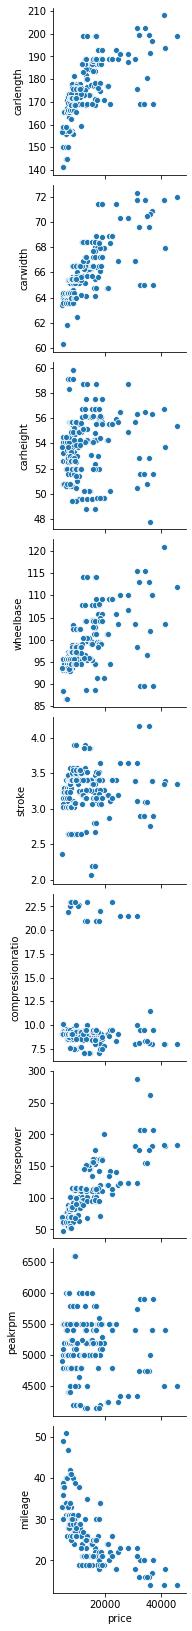

In [17]:
sns.pairplot(data=dataset,x_vars=['price'],y_vars=['carlength','carwidth','carheight','wheelbase','stroke','compressionratio','horsepower','peakrpm','mileage'])

In [11]:
encode_df = pd.get_dummies(dataset,columns=['carbody','enginetype'])

In [12]:
encode_df.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'price', 'doors', 'mileage', 'carbody_convertible', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor'],
      dtype='object')

In [13]:
encode_df.drop(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'drivewheel', 'enginelocation', 'wheelbase','carheight', 'curbweight','cylindernumber','enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio','peakrpm',
        'doors',],axis = 1,inplace=True)

In [14]:
encode_df.columns

Index(['carlength', 'carwidth', 'horsepower', 'price', 'mileage',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'enginetype_dohc', 'enginetype_dohcv',
       'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'],
      dtype='object')

# Length,width,mileage and horsepower can be taken as factor from numerical features

In [15]:
y_train = dataset[['price']].values

In [16]:
X_train = encode_df.drop('price',axis = 1)
X_train

,carlength,carwidth,horsepower,mileage,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,168.8,64.1,111,23.0,1,0,0,0,0,1,0,0,0,0,0,0
1,168.8,64.1,111,23.0,1,0,0,0,0,1,0,0,0,0,0,0
2,171.2,65.5,154,22.0,0,0,1,0,0,0,0,0,0,0,1,0
3,176.6,66.2,102,26.0,0,0,0,1,0,0,0,0,1,0,0,0
4,176.6,66.4,115,19.0,0,0,0,1,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,188.8,68.9,114,25.0,0,0,0,1,0,0,0,0,1,0,0,0
201,188.8,68.8,160,21.0,0,0,0,1,0,0,0,0,1,0,0,0
202,188.8,68.9,134,20.0,0,0,0,1,0,0,0,0,0,0,1,0
203,188.8,68.9,106,26.0,0,0,0,1,0,0,0,0,1,0,0,0


In [17]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [18]:
filename = 'predict.pkl'
pickle.dump(regressor,open(filename,'wb'))

In [26]:
ar = np.array([[168,64,111,23.0,1,0,0,0,0,1,0,0,0,0,0,0]])
regressor.predict(ar)[0][0]

15593.784690444576

In [1]:
import pickle

In [2]:
reg = pickle.load(open('predict.pkl','rb'))

In [5]:
reg.predict([[168,64,111,23.0,1,0,0,0,0,1,0,0,0,0,0,0]])[0][0]

15593.784690444576